# PRACTICA 8. BLOCKCHAIN

### Objetivos:
* Declaración de objetos _block_ que se asemejan a los bloques de una red blockchain.
* Creación de una blockchain de objetos _block_.
* Desplegar  una  red  Blockchain  real  que  permita  registrar  y  minar  transacciones
* Ampliar la red añadiendo nuevos nodos 

### 1.1: Definición del objeto Bloque(_block_).

La clase desarrollada se encuentra en el archivo **block.py**

In [85]:
from block import Block

# Se crea una instancia bloque
block = Block(0,[],10.0,"")
# Se calcula el hash del mismo
hash = block.compute_hash()
print(f"El hash del bloque creado es: {hash}\n")

# Creamos otra instancia bloque (con el index distinto) 
block2 = Block(1,[],10.0,"")
hash2 = block2.compute_hash()
# Comprobamos que los hashed de ambos bloques son muy distintos
print(f"Son los hashs iguales? {hash == hash2}")
print(f"Bloque1: {hash}")
print(f"Bloque2: {hash2}")

El hash del bloque creado es: fdaf7302ca5189620b939114739a75ebc27befc760dc2f3d39a3d855609caaa0

Son los hashs iguales? False
Bloque1: fdaf7302ca5189620b939114739a75ebc27befc760dc2f3d39a3d855609caaa0
Bloque2: 1877a6f3faa3e909f14885d9fe51c413fc5638bd38942f49e21cc5972fb4b959


### 1.2: Definición del objeto blockchain(_Blockchain_)  
La clase desarrollada se encuentra en el archivo **blockchain.py**

In [86]:
from blockchain import Blockchain

# Se crea una instancia de Blockchain
blockchain = Blockchain()
# Probamos a mostrar el último bloque de la blockchain
blockchain.create_genesisBlock()
genesis = blockchain.last_block
print(f"El último bloque de la blockchain, es en este caso, el de genesis: \n{genesis.__dict__}")

El último bloque de la blockchain, es en este caso, el de genesis: 
{'index': 0, 'transactions': [], 'timestamp': 1652355591.815919, 'previous_hash': '0', 'nonce': 0, 'current_hash': '429ffcdc7ac78d8be376216a03f6bd9f16e005969a299b97b7f1fce697e19d9c'}


### 1.3: Definición del Proof‐Of‐Work
Se ha añadido la dificultad de encontrar un hash _válido_. Un hash es _válido_ si comienza por el número de ceros correspondiente a la dificultad establecida en la _Blockchain_.

blockchain de dificultad 3:

In [87]:
from block import Block
from blockchain import Blockchain
from time import time

# Se crea una blockchain con difficultad 3
blockchain1 = Blockchain(difficulty=1)

# Creamos un nuevo bloque para la blockchain
block1 = Block(blockchain1.last_block.index,[],time(),blockchain1.last_block.current_hash)

# BLOCKCHAIN 1
print(f"Blockchain dificultad {blockchain1.difficulty}:")
start = time()
# Se pone a trabajar para encontrar un hash valido para el bloque
blockchain1.proof_of_work(block1)
end = time()
time1 = end - start # Tiempo transcurrido
print(f"El hash válido del bloque: {block1.compute_hash()}\n")
print(f"El valor de nonce necesario: {block1.nonce}")
print(f"El tiempo transcurrido: {time1} (s)")

Blockchain dificultad 1:
El hash válido del bloque: 06fbec596aec179d027d9ca71fae8f80d01311c5482e9b5be90d635ad25bdf48

El valor de nonce necesario: 4
El tiempo transcurrido: 0.0 (s)


Para probar el correcto funcionamiento de esta nueva implementación, realizamos un experimento con varias cadenas de distinta dificultad:

In [91]:

# Se crean nuevas blockchain
blockchains = []
difficulties = range(0,6)
for i in difficulties:
    blockchains.append(Blockchain(difficulty=i)) # difficultad variable

times = [] # Para los tiempos de ejecucion
for blockchain in blockchains:
    # Creamos un nuevo bloque para cada blockchain
    block = Block(blockchain.last_block.index,[],time(),blockchain.last_block.current_hash)
    print(f"Blockchain dificultad {blockchain.difficulty}:")
    start = time()
    # Se pone a trabajar para encontrar un hash valido para el bloque
    blockchain.proof_of_work(block)
    end = time()
    time_elapsed = end - start
    times.append(time_elapsed) # Tiempo transcurrido
    print(f"El hash válido del bloque: {block.compute_hash()}")
    print(f"El valor de nonce necesario: {block.nonce}")
    print("----------------------------------------------------")

Blockchain dificultad 0:
El hash válido del bloque: a2ea58b4990e71bb965e68846083806a2f9bf7c6a24b9690176d1c4bf5530d46
El valor de nonce necesario: 0
----------------------------------------------------
Blockchain dificultad 1:
El hash válido del bloque: 08cfa4a816e8fb6142766cc281c7ef51e80e2aa4c9ad2b331960c830444d999a
El valor de nonce necesario: 6
----------------------------------------------------
Blockchain dificultad 2:
El hash válido del bloque: 00496a53fa404f7aa5a9063917779a4f503462e11786d99cf65f75028f0644c0
El valor de nonce necesario: 119
----------------------------------------------------
Blockchain dificultad 3:
El hash válido del bloque: 000d25b7caccb1027ae6293e8e66cf4e80c02934edabe5a7a3de3c614b59862d
El valor de nonce necesario: 3745
----------------------------------------------------
Blockchain dificultad 4:
El hash válido del bloque: 0000a46b0605ccac7334299cd071af69e0ab8c2188e9b587a2388b5304da6fac
El valor de nonce necesario: 33587
---------------------------------------

Representamos en una gráfica los tiempos de trabajo obtenidos para las distintas blockchain. Como era de esperar, se puede deducir que a mayor dificultad mayor tiempo de ejecución.

Text(0, 0.5, 'Tiempo (s)')

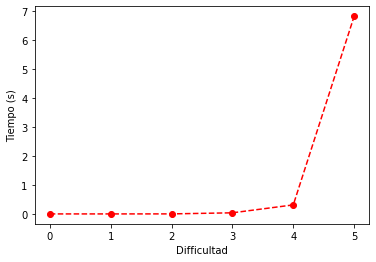

In [92]:
import matplotlib.pyplot as plt

# Se muestra en una gráfica los tiempos de procesado
plt.plot(difficulties,times,"ro--")
plt.xlabel("Difficultad")
plt.ylabel("Tiempo (s)")

### 1.4: Minado de Bloques. 
En este apartado se ha desarrollado la funcionalidad para  permitir el minado de bloques. Esto permite a los usuarios de la _blockchain_ poder registrar sus transacciones en la red. Para ello se utilizá la funcionalidad de POW o _Proof-of-work_ del anterior apartado.

In [6]:
%reset -f

In [4]:
from block import Block
from blockchain import Blockchain
from time import time

# Se crea la cadena de blockchain
blockchain = Blockchain()
print(f"Longitud de la blockchain: {len(blockchain.chain)}\n")

# Se crea un nuevo bloque
block = Block(blockchain.last_block.index,["Esto es una prueba"],time(),blockchain.last_block.current_hash)

# Sacamos el hash valido del bloque
valid_hash = blockchain.proof_of_work(block)
print(f"El hash valido encontrado: {valid_hash}\n")

# Se añade el bloque a la blockchain
added = blockchain.append_block(block,valid_hash)
print(f"¿Se añadió correctamente el bloque? {added}")
print(f"Longitud de la blockchain: {len(blockchain.chain)}")
print(f"El último bloque de la blockchain: {blockchain.last_block.__dict__}\n")

# Se añaden nuevas transacciones a la blockchain
blockchain.add_new_transaction("Raul debe 10€ a David")
blockchain.add_new_transaction("Mbappe al Real Madrid")
blockchain.add_new_transaction("Raul paga 10€ a David")
print(f"Transacciones pendientes: {blockchain.unconfirmed_transactions}\n")

# Se realiza un minado para incluir las transacciones pendientes a la blockchain
blockchain.mine()
print(f"Longitud de la blockchain: {len(blockchain.chain)}")
print(f"El último bloque de la blockchain: {blockchain.last_block.__dict__}")

Longitud de la blockchain: 1

El hash valido encontrado: 00f06f9c43bd7d5c153039949f1e2b69839ca424d7ecc28471010ad433269f37

¿Se añadió correctamente el bloque? True
Longitud de la blockchain: 2
El último bloque de la blockchain: {'index': 0, 'transactions': ['Esto es una prueba'], 'timestamp': 1652357491.270093, 'previous_hash': 'b94482d925206fcad8efa7e45d560acd9ba67ad02a4018e6a4595f1b3c10c796', 'nonce': 83, 'current_hash': '00f06f9c43bd7d5c153039949f1e2b69839ca424d7ecc28471010ad433269f37'}

Transacciones pendientes: ['Raul debe 10€ a David', 'Mbappe al Real Madrid', 'Raul paga 10€ a David']

Longitud de la blockchain: 3
El último bloque de la blockchain: {'index': 1, 'transactions': ['Raul debe 10€ a David', 'Mbappe al Real Madrid', 'Raul paga 10€ a David'], 'timestamp': 1652357491.2780428, 'previous_hash': '00f06f9c43bd7d5c153039949f1e2b69839ca424d7ecc28471010ad433269f37', 'nonce': 395, 'current_hash': '005acf04f03bc1445c4ca6926329a502030e7bf755b62a8479ed3c34337d5626'}


### 1.5: Chequeo de la cadena. 
En esta seccion se ha desarrollado una funcionalidad para comprobar la validez de una cadena de bloques al completo. Para ello se debe comprobar que todos los bloques hayan sido introducidos de forma correcta y empleando un hash válido.

In [27]:
# Usamos la cadena creada en el apartado 1.4
is_valid = blockchain.check_chain(blockchain.chain)
print(f"¿Es la blockchain valida? {is_valid}")

¿Es la blockchain valida? True


Sin embargo, es conveniente probar si detecta una cadena mal construida.

In [31]:
# Creamos otra blockchain
blockchain2 = Blockchain()

# Creamos un bloque incorrectamente
bad_block = Block(blockchain2.last_block.index,[],time(),blockchain2.last_block.current_hash)
bad_block.current_hash = bad_block.compute_hash()

# Intentamos añadir el bloque 'malo' a la blockchain
added = blockchain2.append_block(bad_block,bad_block.current_hash)
print(f"¿Ha funcionado añadir el bloque incorrecto? {added}")
print(f"Longitud de la blockchain: {len(blockchain2.chain)}")

¿Ha funcionado añadir el bloque incorrecto? False
Longitud de la blockchain: 1


Con el método desarrollado no se pueden introducir bloques de forma incorrecta, a validarse el hash. Lo que es bueno. 

Por lo tanto, se deberá proceder de una manera rudimentaria.

In [32]:
# Añadimos directamente el bloque a la cadena
blockchain2.chain.append(bad_block)
print(f"¿Ha funcionado añadir el bloque incorrecto? {blockchain2.last_block == bad_block}")
print(f"Longitud de la blockchain: {len(blockchain2.chain)}\n")

# Chequeamos ahora la validez de la blockchain
is_valid = blockchain2.check_chain(blockchain2.chain)
print(f"¿Es la blockchain valida? {is_valid}")


¿Ha funcionado añadir el bloque incorrecto? True
Longitud de la blockchain: 2

¿Es la blockchain valida? False


Queda demostrado que el método detecta correctamente cuando la cadena no es válida.

### 1.6 Definicion de API REST: Inserción de transacciones
En este apartado es el turno de desarrollar una interfaz de tipo API REST para establecer comunicaciones con la _Blockchain_.

In [2]:
%reset -f

In [1]:
import API

# Levantamos la app (localhost y puerto 8000)
API.app.run(host='127.0.0.1',port=8000,debug=False)

 * Serving Flask app 'API' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/May/2022 15:54:51] "GET /pending_transactions HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:54:55] "POST /new_transaction HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:54:57] "GET /pending_transactions HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:56:52] "POST /new_transaction HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:57:07] "GET /pending_transactions HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:57:12] "GET /mine HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:57:21] "GET /chain HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:57:57] "POST /register_new_node HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:58:25] "GET /chain HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:58:25] "GET /chain HTTP/1.1" 201 -
127.0.0.1 - - [17/May/2022 15:58:25] "POST /add_block HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:58:37] "GET /pending_transactions HTTP/1.1" 200 -
127.0.0.1 - - [17/May/2022 15:58:39] "GET /chain HTTP/1.1" 20

**¡IMPORTANTE!** Para testear los distintos endpoint desarrollados, se precisa ejecutar el código correspondiente a cada apartado en el notebook **_api.ipynb_**